#  Anomalous activities by small and mid-size enterprises

Small and Mid-size Enterprises (SME).

For the SMEs operating in the same industry segment:
 * Total asset and operating profits are expected to be correlated.
 * If a firm generated too much profit with a limited amount of assets, there may be some illegal activities contributing to the profits
 * If a firm generated too little profit with an abundant amount of assets, the operating profits may be disguised for tax purposes

 ## Imports

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

**Question 1**: import *k*-means and isolation forest learners from sklearn.

In [23]:
from sklearn.cluster import KMeans
from sklearn.ensemble import IsolationForest


## Load data

**Question 2**: load `week06_tutorial_data.csv` and print the first 5 rows.

In [24]:
df= pd.read_csv('/Users/pratiksha/Documents/Schulich/AI in Business I/week06_tutorial_data.csv')

In [25]:
df.head()

,Total Assets,Operating Profits
0,1686.275119,1070.262036
1,8208.664875,1118.977096
2,11041.828780,961.875285
3,-3613.136390,9042.081321
4,760.941151,479.629689


**Question 3**: Store the values in a numpy array called `X`.

In [26]:
X = df.values


**Question 4**: How many points/datum and features are there in `X`?

In [27]:
num_points, num_features = X.shape
print(f"Number of points: {num_points}")
print(f"Number of features: {num_features}")

Number of points: 140
Number of features: 2


In [28]:
X.shape

(140, 2)

## Model

### Isolation forest

**Question 5**: Instantiate an isolation forest with 10,000 estimators. Call it `iso_model`.

In [29]:
iso_model = IsolationForest(n_estimators=10000, n_jobs=1)


In [49]:
'''iso_model = IsolationForest(n_estimators=10000, contamination=0.1)''' # try with contamination as well for the parameter

'iso_model = IsolationForest(n_estimators=10000, contamination=0.1)'

**Question 6**: What is an *estimator*?

*Answer: ...*

**Question 7**: Fit the model.

In [30]:
iso_model.fit(X)

IsolationForest(n_estimators=10000, n_jobs=1)

**Question 8**: Predict anomalies.

In [31]:
isomodel_pred = iso_model.predict(X)

In [32]:
isomodel_pred

array([ 1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,
        1,  1,  1,  1, -1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1, -1, -1,  1, -1,  1,  1,  1, -1,
        1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1, -1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1, -1, -1,  1,  1,  1,  1,  1,  1,  1, -1,  1,
       -1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,
        1,  1,  1,  1,  1, -1,  1,  1,  1, -1, -1,  1, -1,  1,  1,  1,  1,
        1,  1, -1,  1])

In [33]:
np.unique(isomodel_pred)

array([-1,  1])

**Question 9**: How do we recognize the anomalies (and the non-anomalies)?

In [34]:
print(isomodel_pred)

[ 1  1  1 -1  1  1  1  1  1  1  1  1 -1  1  1  1  1  1  1  1  1 -1  1  1
 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1 -1 -1  1 -1  1  1  1 -1  1 -1  1  1
  1  1  1  1  1  1  1 -1 -1  1  1  1  1  1  1  1  1  1  1 -1 -1  1  1  1
  1  1  1  1 -1  1 -1  1  1  1 -1  1  1  1  1  1  1  1  1  1 -1  1  1  1
  1  1  1  1 -1  1  1  1 -1 -1  1 -1  1  1  1  1  1  1 -1  1]


In [35]:
iso_anomalies = X[isomodel_pred == -1]
print(iso_anomalies)

[[-3613.13639     9042.081321  ]
 [21080.5679        73.89734466]
 [ -624.7830939    311.2412554 ]
 [ -678.1815671    701.8788145 ]
 [ 1552.038858      25.11739487]
 [17756.99383      951.7891524 ]
 [13998.23389     1979.122167  ]
 [17456.5836      1852.249609  ]
 [17253.91381     1026.683119  ]
 [17352.06676     1850.816676  ]
 [-1749.92279     7029.013569  ]
 [18318.75342     1639.062971  ]
 [ -892.737179     499.6749025 ]
 [20295.34954       83.69841288]
 [-3366.153133    -105.5456532 ]
 [22565.88102       83.64983378]
 [16655.23456      886.2143512 ]
 [-2573.395943     -57.56049155]
 [ 8479.97208     1639.956329  ]
 [ -948.8869561    -31.8414615 ]
 [21927.03203       48.6362547 ]
 [16654.50314     1522.135285  ]]


**Question 10**: Remember slide 11: *Classify: classify points above a set threshold as anomalies*?

**Question 11**: Did we set a threshold. If not, how is it set?

*Answer: ...*



### *K*-means

**Question 12**: Instantiate and fit *k*-means model. Call it `kmeans_model`.

**Question 13**: What should *k* be?

*Answer: ...*

In [36]:
kmeans_model = KMeans(n_clusters=1)
kmeans_model.fit(X)

KMeans(n_clusters=1)

In [37]:
centroid = kmeans_model.cluster_centers_

In [38]:
print(centroid)

[[8359.93803871 1058.50770192]]


In [39]:
distances = np.sqrt(((centroid - X)**2).sum(axis=1)) 

In [40]:
sorted_ids = np.argsort(distances)

In [41]:
distances[sorted_ids[-14:]]

array([ 9045.15285511,  9131.2094863 ,  9269.53573714,  9372.46414142,
        9397.66175138,  9975.72294218, 10990.15014311, 11741.21911407,
       11783.72752489, 11975.1534794 , 12758.67867859, 13604.62714331,
       14239.35264858, 14390.69001148])

In [42]:
kmeans_anomalies = X[sorted_ids[-14:]]

In [43]:
print(distances)

[ 6673.67327117   162.91137983  2683.63107974 14390.69001148
  7621.01393919  1501.32481882   339.72906746  6742.63356264
  7577.06036797  1825.95709914  3000.94586511   997.56001709
 12758.67867859  3240.29542005  2808.29756676  8261.91719344
  1515.10675865  4683.3520671   1353.6723983   7235.17982419
  7774.70651114  9015.7429518   2117.74553131   597.32377171
  9045.15285511  1100.25803229   171.94328853  6664.5530578
  3116.90058984  2901.16049086   808.67288149  6709.77736488
  1752.43690477   995.47376807  4767.36129381   402.03555475
  3543.84882015   747.07209135  7489.76248846  2374.00422039
   799.40770258  3361.4979714   2676.86470712  5389.86535421
  6926.81471071  3619.69402015   199.91852814  1321.3130746
  2354.36108343  1684.86702486  4778.5483543    774.63659445
   505.09753605  1032.25854956  4911.4635711    911.82631821
  4107.63433943  4118.53264902  2426.81213408  4362.1697384
  6885.88315189  9397.66175138  4687.05208542  5712.95992459
  3204.5407241   1789.52496

**Question 14**: How can we use the fitted model for anomaly detection?

In [44]:
kmeans_model_pred = kmeans_model.predict(X)

In [45]:
print(kmeans_model_pred)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [46]:
kmeans_anomalies = X[kmeans_model_pred == 1]
print(kmeans_anomalies)

[]


**Question 15**: Do we need to set a threshold? If yes, then how?

*Answer: ...*

## Plot

### Isolation forest

Text(0, 0.5, 'Operating Profits')

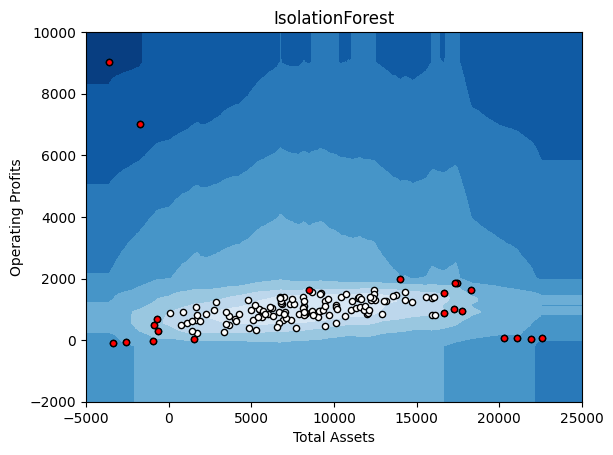

In [47]:
# plot the line, the samples, and the nearest vectors to the plane
xx, yy = np.meshgrid(np.linspace(-5000, 25000, 500), np.linspace(-2000, 10000, 100))
Z = iso_model.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.title("IsolationForest")
plt.contourf(xx, yy, Z, cmap=plt.cm.Blues_r)

plt.scatter(X[:, 0], X[:, 1], c='white', s=20, edgecolor='k')
plt.scatter(iso_anomalies[:, 0], iso_anomalies[:, 1], c='red', ec='k', s=20)
plt.axis('tight')
plt.xlim((-5000, 25000))
plt.ylim((-2000, 10000))
plt.xlabel('Total Assets')
plt.ylabel('Operating Profits')

## *K*-means

Text(0.5, 1.0, 'K-means')

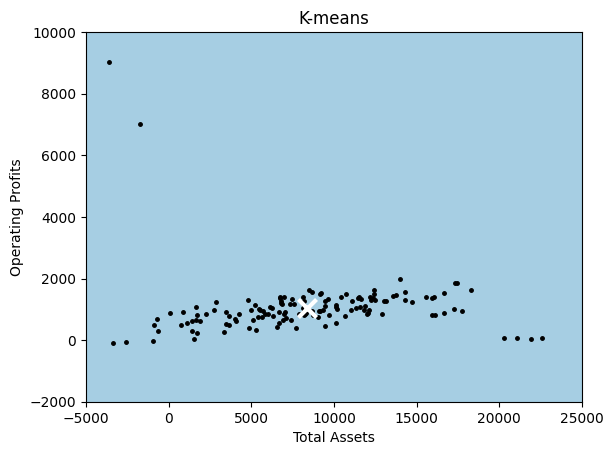

In [48]:
xx, yy = np.meshgrid(np.linspace(-5000, 25000, 500), np.linspace(-2000, 10000, 100))
Z = kmeans_model.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(Z, interpolation="nearest", extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired, aspect="auto", origin="lower")

centroids = kmeans_model.cluster_centers_

plt.plot(X[:, 0], X[:, 1], "k.", markersize=5)
plt.scatter(kmeans_anomalies[:, 0], kmeans_anomalies[:, 1], marker='o', c='red', ec='r', s=50)
plt.scatter(centroids[:, 0], centroids[:, 1], marker="x", s=169, linewidths=3, color="w", zorder=10)
plt.xlabel('Total Assets')
plt.ylabel('Operating Profits')
plt.title("K-means")